In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
'''
the format of x is:
[
  [x_0(0), x_1(0), ... , x_n(0)],
  ...,
  [x_0(n), x_1(n), ... , x_n(n)]
]

the all_x contains the opinion of all agents in all the iteration,
all_x[k] is the opinion of all agents in iteration k,
where all_x[k][i] is the opinion of agent_i in iteration k
'''

'\nthe format of x is:\n[\n  [x_0(0), x_1(0), ... , x_n(0)],\n  ...,\n  [x_0(n), x_1(n), ... , x_n(n)]\n]\n\nthe all_x contains the opinion of all agents in all the iteration,\nall_x[k] is the opinion of all agents in iteration k,\nwhere all_x[k][i] is the opinion of agent_i in iteration k\n'

In [3]:
def HK_model_control_group(x: list, graph, d: float, num_iteration: int):
  n = len(x)

  all_x = []
  # save x(0)
  all_x.append(x)

  for k in range(1, num_iteration+1):
    new_x = []
    for i in range(n):
      agent_i = x[i]
      sum_of_trusted_individuals = 0
      num_of_trusted_individuals = 0

      # find trusted individuals
      for j in range(n):
        agent_j = x[j]
        if (abs(agent_j - agent_i) <= d):
          if (graph[i][j] != 0 or i == j):
            sum_of_trusted_individuals += agent_j
            num_of_trusted_individuals += 1

      # get x_i(k+1)
      new_agent_i = sum_of_trusted_individuals / num_of_trusted_individuals
      new_x.append(new_agent_i)

    # update x(k+1)
    x = new_x

    all_x.append(x)

  return np.array(all_x)

In [4]:
def plot_HK_model_process(all_x: list, num_iteration: int, title: str):
    fig = plt.figure(figsize=(10, 7))
    steps = [step for step in range(num_iteration + 1)]

    for i in range(len(all_x[0])):
        # plot agent_i's opinion in each iteration
        if (i < 100):
          plt.plot(steps, all_x[:num_iteration+1, i])
        else:
          plt.plot(steps, all_x[:num_iteration+1, i], color="grey")

    plt.title(title)
    plt.xlabel('step, k')
    plt.ylabel('opinions, x_i(k)')
    plt.xticks(np.arange(0, num_iteration+1, 2), fontsize=8)
    plt.yticks(np.arange(0, 1+0.1, 0.1), fontsize=8)
    plt.tight_layout()
    plt.show()

In [5]:
opinions_filepath = "./opinionAll"
opinions = np.loadtxt(opinions_filepath)

graph_filepath = "./network"
graph = np.loadtxt(graph_filepath)

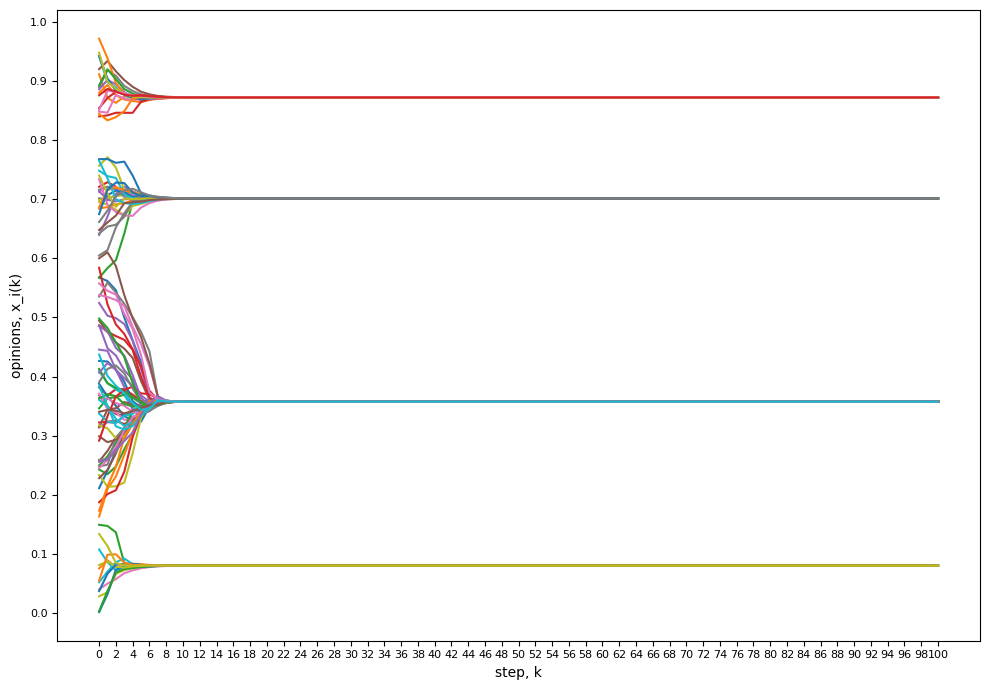

In [6]:
all_x = HK_model_control_group(opinions[:100], graph[:100, :100], 0.1, 100)
plot_HK_model_process(all_x, 100, "")

In [7]:
def con_control_model_1(all_x: np.ndarray):
  initial_opinion = all_x[0]
  final_opinion = all_x[-1]
  ideal_opinion = sum(initial_opinion)/len(initial_opinion)
  con = 0
  for i in range(len(final_opinion)):
    con += abs(final_opinion[i]-ideal_opinion)
  return con

In [8]:
con = con_control_model_1(all_x)
print("The convergence factor is", con)

The convergence factor is 22.44042898982107
